## Inception Model in Malaria Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# !unzip Dataset.zip

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/Dataset/Train'
test_path = '/content/Dataset/Test'

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)

In [ ]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 2 classes
predictions = Dense(2, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

    

In [ ]:
base_model

In [ ]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, None, None, 3 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, None, None, 3 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [ ]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# training_set = train_datagen.flow_from_directory('/Users/akshayadlakha/Downloads/Dataset/Train',
#                                                  target_size = (224, 224),
#                                                  batch_size = 32,
#                                                  class_mode = 'categorical')


training_set = train_datagen.flow_from_directory('/content/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [ ]:
# test_set = test_datagen.flow_from_directory('/Users/akshayadlakha/Downloads/Dataset/Test',
#                                             target_size = (224, 224),
#                                             batch_size = 32,
#                                             class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 134 images belonging to 2 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=13,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/13
13/13 [==============================] - 6s 438ms/step - loss: 3.9845 - accuracy: 0.6418 - val_loss: 0.2363 - val_accuracy: 0.8955
Epoch 2/13
13/13 [==============================] - 4s 345ms/step - loss: 0.4727 - accuracy: 0.8269 - val_loss: 0.3130 - val_accuracy: 0.8582
Epoch 3/13
13/13 [==============================] - 5s 348ms/step - loss: 0.2950 - accuracy: 0.8870 - val_loss: 0.6822 - val_accuracy: 0.7687
Epoch 4/13
13/13 [==============================] - 4s 343ms/step - loss: 0.3915 - accuracy: 0.8462 - val_loss: 0.4849 - val_accuracy: 0.8284
Epoch 5/13
13/13 [==============================] - 4s 344ms/step - loss: 0.3919 - accuracy: 0.8870 - val_loss: 0.1821 - val_accuracy: 0.9328
Epoch 6/13
13/13 [==============================] - 5s 350ms/step - loss: 0.2792 - accuracy: 0.8990 - val_loss: 0.1541 - val_accuracy: 0.9403
Epoch 7/13
13/13 [==============================] - 5s 349ms/step - loss: 0.1920 - accuracy: 0.9207 - val_loss: 0.2268 - val_accuracy: 0.8881
Epoch 

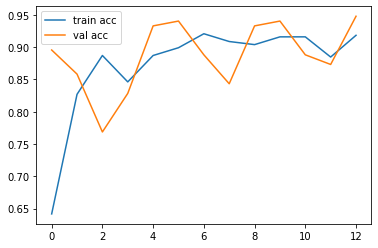

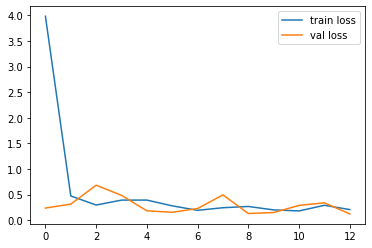

In [ ]:
# accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [ ]:
model.save('model_malariainception.h5')

In [ ]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_2
1 conv2d_94
2 batch_normalization_94
3 activation_94
4 conv2d_95
5 batch_normalization_95
6 activation_95
7 conv2d_96
8 batch_normalization_96
9 activation_96
10 max_pooling2d_4
11 conv2d_97
12 batch_normalization_97
13 activation_97
14 conv2d_98
15 batch_normalization_98
16 activation_98
17 max_pooling2d_5
18 conv2d_102
19 batch_normalization_102
20 activation_102
21 conv2d_100
22 conv2d_103
23 batch_normalization_100
24 batch_normalization_103
25 activation_100
26 activation_103
27 average_pooling2d_9
28 conv2d_99
29 conv2d_101
30 conv2d_104
31 conv2d_105
32 batch_normalization_99
33 batch_normalization_101
34 batch_normalization_104
35 batch_normalization_105
36 activation_99
37 activation_101
38 activation_104
39 activation_105
40 mixed0
41 conv2d_109
42 batch_normalization_109
43 activation_109
44 conv2d_107
45 conv2d_110
46 batch_normalization_107
47 batch_normalization_110
48 activation_107
49 activation_110
50 average_pooling2d_10
51 conv2d_106
52 conv2d_108
53 conv2d

In [ ]:
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

In [ ]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
13/13 [==============================] - 5s 358ms/step - loss: 0.1681 - val_loss: 0.1025
Epoch 2/5
13/13 [==============================] - 5s 355ms/step - loss: 0.1658 - val_loss: 0.0987
Epoch 3/5
13/13 [==============================] - 5s 351ms/step - loss: 0.1461 - val_loss: 0.1004
Epoch 4/5
13/13 [==============================] - 5s 352ms/step - loss: 0.1587 - val_loss: 0.1022
Epoch 5/5
13/13 [==============================] - 5s 357ms/step - loss: 0.1316 - val_loss: 0.1051


In [ ]:
model.save('model_inception_sgd.h5')

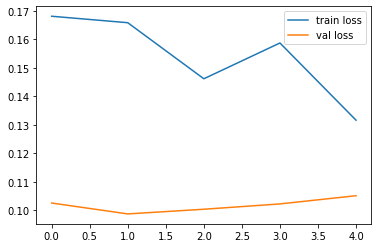

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('model_inception_sgd.h5')
# model = load_model('model_inception_rms.h5')

In [ ]:
img1 = image.load_img('m1.png',target_size=(224,224))
imgnor=image.img_to_array(img1)
imgnor=np.expand_dims(imgnor,axis=0)
img_datanor=preprocess_input(imgnor)
img_datanor.shape


(1, 224, 224, 3)

In [ ]:
resultnor = model.predict(img_datanor)
print(resultnor)
np.argmax(resultnor, axis = 1)

[[0.04276346 0.95723647]]


array([1])